<a href="https://colab.research.google.com/github/Francisco-Dougllas/03_SQL_Data_Science/blob/main/1_Python_Com_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Projeto SQL com Pandas</font>

## <font color='red'>Definição do Problema</font>

    Temos em mãos um arquivo com dados de pacientes que desenvolveram ou não
    diabetes. Precisamos gerar uma amostra de dados com os pacientes com mais de 50 anos e para
    cada um deles indicar em uma nova coluna se o paciente está normal (índice de massa corpórea
    menor que 30) ou obeso (índice de massa corpórea maior ou igual a 30). Então devemos gerar
    um novo arquivo CSV.
    Vamos resolver esse problema com Banco de Dados, Python e SQL. Os dados serão
    inicialmente carregados com Linguagem Python. Faremos então uma cópia dos dados para um
    banco de dados e usaremos Linguagem SQL para as transformações necessárias. Por fim,
    copiaremos os dados transformados de volta para um dataframe do Pandas para salvar o
    resultado em formato CSV.
    
https://www.kaggle.com/uciml/pima-indians-diabetes-database

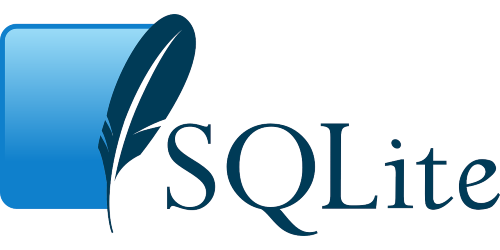

In [ ]:
from IPython.display import Image
Image('sql.png')

## Instalando e Carregando os Pacotes

In [ ]:
# Instalando o Pacote Wartemark

# No meu caso como estou ja fiz todo o processo,  não irei executa essa celula

# !pip install -q -U watermark

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.9.12


In [ ]:
# Imports bibliotecas
import pandas as pd
import sqlite3

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Versoes dos Pacotes" --iversions

Author: Versoes dos Pacotes

sqlite3: 2.6.0
pandas : 1.4.3



## Banco Relacional, Python e SQL Para Análise de Dados

In [ ]:
# Cria um dataframe
dados = pd.DataFrame({'nome': ['Amanda', 'Ricardo', 'Raul', 'Flamengo', 'Vasco', 'Tor'],
                      "idade": [23, 45, 65, 13, 45, 60],
                      'cargo': ['Cientista', 'Analista', 'Medico', 'Pintor', 'Mecanico', 'Jardineiro']})
dados.head()

,nome,idade,cargo
0,Amanda,23,Cientista
1,Ricardo,45,Analista
2,Raul,65,Medico
3,Flamengo,13,Pintor
4,Vasco,45,Mecanico


In [ ]:
# Caso o Banco ja exista devemos Apaga o Banco de Dados
!del "projetoSQL.db"

In [ ]:
# Criando a conexão a um banco de dados SQLite
conexao = sqlite3.connect('projetoSQL.db')

In [ ]:
# Copia o dataframe para dentro do banco de dados como uma tabela
dados.to_sql('funcionarios', conexao)

6

In [ ]:
# Carregamos a extensão SQL
%load_ext sql

In [ ]:
# Definido o banco de dados
%sql sqlite:///projetoSQL.db

> ### Agora executamos nossas consultas SQL usando diretamente Linguagem SQL dentro do Jupyter Notebook.

#### <font color='red'>Observação: Para que o Notebook não fique tão extenso, foi inserido um limite de apenas 10 Linhas Para Visualização dos Dados</font>

In [ ]:
%%sql

-- Seleciona Para Mim tudo Na Tabela Funcionarios

SELECT * FROM funcionarios

 * sqlite:///projetoSQL.db
Done.


index,nome,idade,cargo
0,Amanda,23,Cientista
1,Ricardo,45,Analista
2,Raul,65,Medico
3,Flamengo,13,Pintor
4,Vasco,45,Mecanico
5,Tor,60,Jardineiro


In [ ]:
%%sql

-- Conte Para mim o total de Funcionarios

SELECT count(*) FROM funcionarios

 * sqlite:///projetoSQL.db
Done.


count(*)
6


In [ ]:
%%sql

-- Caculando a Idade Media dos Funcionarios 

SELECT avg(idade) as 'Idade_media' FROM funcionarios

 * sqlite:///projetoSQL.db
Done.


Idade_media
41.833333333333336


## Banco Relacional, Python e SQL Para Análise de Dados

Temos em mãos um arquivo com dados de pacientes que desenvolveram ou não diabetes. Precisamos gerar uma amostra de dados com os pacientes com mais de 50 anos e para cada um deles indicar em uma nova coluna se o paciente está normal (BMI menor que 30) ou obeso (BMI maior ou igual a 30). Então devemos gerar um novo arquivo CSV e encaminhar para o Cientista de Dados.

In [ ]:
# Carregando a Base de Dados
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Tipo da Base
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Shape Da Base de Dados, Linhas e Colunas
df.shape

(768, 9)

In [ ]:
# Ultimas 5 Linhas
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Copiando o dataframe para dentro do banco de dados como uma tabela
df.to_sql('diabetes', conexao)

768

In [ ]:
%%sql

-- Conte Para Mim os dados de Diabetes

SELECT count(*) FROM diabetes

 * sqlite:///projetoSQL.db
Done.


count(*)
768


In [ ]:
%%sql

-- Selecione para mim das colunas... De toda tabela diabetes onde Glucose seja maior que 100
-- Mostre Para Mim Apenas os 10 Primeiros Registros LIMIT

SELECT Age, Glucose, Outcome 
FROM diabetes WHERE Glucose > 100

-- Irei utiliza o LIMIT de 10 Linhas e Todo o processo

LIMIT 10

 * sqlite:///projetoSQL.db
Done.


Age,Glucose,Outcome
50,148,1
32,183,1
33,137,1
30,116,0
29,115,0
53,197,1
54,125,1
30,110,0
34,168,1
57,139,0


In [ ]:
# Analisando as Colunas
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
%%sql

-- Crie para mim os seguintes dados na tabela pacientes

CREATE TABLE pacientes(Pregnancies INT,
                        Glucose INT,
                        BloodPressure INT,
                        SkinThickness INT,
                        Insulin INT,
                        BMI DECIMAL(8, 2),
                        DiabetesPedigreeFunction DECIMAL(8, 2),
                        Age INT,
                        Outcome INT);

 * sqlite:///projetoSQL.db
Done.


[]

In [ ]:
%%sql

-- Selecione tudo na tabela pacientes

SELECT *
FROM pacientes

 * sqlite:///projetoSQL.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Perceba acima que foi criada as colunas necessarias, agora iremos inserir dados nelas

In [ ]:
%%sql

INSERT INTO pacientes(Pregnancies, 
                      Glucose, 
                      BloodPressure, 
                      SkinThickness, 
                      Insulin, 
                      BMI, 
                      DiabetesPedigreeFunction, 
                      Age, 
                      Outcome) 
SELECT Pregnancies, 
       Glucose, 
       BloodPressure, 
       SkinThickness, 
       Insulin, 
       BMI, 
       DiabetesPedigreeFunction, 
       Age, 
       Outcome 
FROM diabetes WHERE Age > 50;

 * sqlite:///projetoSQL.db
81 rows affected.


[]

In [ ]:
%%sql

-- Agora iremos analise os dados preenchidos

SELECT *
FROM pacientes
LIMIT 10

 * sqlite:///projetoSQL.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
11,143,94,33,146,36.6,0.254,51,1
13,145,82,19,110,22.2,0.245,57,0
5,109,75,26,0,36,0.546,60,0
4,111,72,47,207,37.1,1.39,56,1
9,171,110,24,240,45.4,0.721,54,1


In [ ]:
%%sql

-- Criando uma tabela (Perfil)

ALTER TABLE pacientes
ADD Perfil VARCHAR(10);

 * sqlite:///projetoSQL.db
Done.


[]

In [ ]:
%%sql

SELECT *
FROM pacientes
LIMIT 10

 * sqlite:///projetoSQL.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
2,197,70,45,543,30.5,0.158,53,1,None
8,125,96,0,0,0,0.232,54,1,None
10,139,80,0,0,27.1,1.441,57,0,None
1,189,60,23,846,30.1,0.398,59,1,None
5,166,72,19,175,25.8,0.587,51,1,None
11,143,94,33,146,36.6,0.254,51,1,None
13,145,82,19,110,22.2,0.245,57,0,None
5,109,75,26,0,36,0.546,60,0,None
4,111,72,47,207,37.1,1.39,56,1,None
9,171,110,24,240,45.4,0.721,54,1,None


In [ ]:
%%sql

-- Atualizando a coluna Perfil. Primeiro iremos atualiza com BMI normal

UPDATE pacientes
SET Perfil = 'Normal'
WHERE BMI < 30;

-- Atualize para mim a tabela Pacientes com Perfil Normal onde o BMI seja Menor que 30

 * sqlite:///projetoSQL.db
Done.
0 rows affected.


[]

In [ ]:
%%sql

SELECT *
FROM pacientes
LIMIT 10

 * sqlite:///projetoSQL.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
2,197,70,45,543,30.5,0.158,53,1,None
8,125,96,0,0,0,0.232,54,1,Normal
10,139,80,0,0,27.1,1.441,57,0,Normal
1,189,60,23,846,30.1,0.398,59,1,None
5,166,72,19,175,25.8,0.587,51,1,Normal
11,143,94,33,146,36.6,0.254,51,1,None
13,145,82,19,110,22.2,0.245,57,0,Normal
5,109,75,26,0,36,0.546,60,0,None
4,111,72,47,207,37.1,1.39,56,1,None
9,171,110,24,240,45.4,0.721,54,1,None


In [ ]:
%%sql

-- Atualizando os Dados que faltam com Perfil Obeso

UPDATE pacientes
SET Perfil = 'Obeso'
WHERE BMI >= 30;

-- Atualize para mim com o Pefil de Obeso onde o BMI seja maior que 30

 * sqlite:///projetoSQL.db
Done.
0 rows affected.


[]

In [ ]:
%%sql

SELECT *
FROM pacientes
LIMIT 10

 * sqlite:///projetoSQL.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
2,197,70,45,543,30.5,0.158,53,1,Obeso
8,125,96,0,0,0,0.232,54,1,Normal
10,139,80,0,0,27.1,1.441,57,0,Normal
1,189,60,23,846,30.1,0.398,59,1,Obeso
5,166,72,19,175,25.8,0.587,51,1,Normal
11,143,94,33,146,36.6,0.254,51,1,Obeso
13,145,82,19,110,22.2,0.245,57,0,Normal
5,109,75,26,0,36,0.546,60,0,Obeso
4,111,72,47,207,37.1,1.39,56,1,Obeso
9,171,110,24,240,45.4,0.721,54,1,Obeso


## Carregando os Dados no Pandas e Salvando o CSV

In [ ]:
# Criando uma Query
query = conexao.execute('SELECT * FROM pacientes')
query

In [ ]:
# Usando List Comprehension para visualizacao das colunas
colunas = [coluna[0] for coluna in query.description]
colunas

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Perfil']

In [ ]:
# Gerando o dataframe
result = pd.DataFrame.from_records(data=query.fetchall(), columns=colunas)

In [ ]:
# Shape
result.shape

(81, 10)

In [ ]:
# Visualiza
result.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
0,2,197,70,45,543,30.5,0.158,53,1,Obeso
1,8,125,96,0,0,0.0,0.232,54,1,Normal
2,10,139,80,0,0,27.1,1.441,57,0,Normal
3,1,189,60,23,846,30.1,0.398,59,1,Obeso
4,5,166,72,19,175,25.8,0.587,51,1,Normal


#### Agora so nos resta Salva em CSV


In [ ]:
result.to_csv('dados_pacientes.csv', index=False)